In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The dataset contain the data of the customer. On the basis of the data we have to predict the churn
rate by the customer.

The dataset contains the data like
'cusotmer_id','gender', 'seniorcitizen','Partner','Dependents','tenure','PhoneService','MultipleLines',
'InternetService,'Online Security', One Backup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges' and 'Churn'



# IMPORTING DATASET

In [2]:
df=pd.read_csv("Customer_churn_model")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataset contain the details of customer in which both numerical and categorical data are present
Here 'Churn' is the target variable which contains 2 categories so it will be termed  'Classification Problem'.

In [3]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.tail(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7024,7398-LXGYX,Male,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No
7025,2823-LKABH,Female,0,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.4,No
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


# Exploratory Data Analysis (EDA)

In [5]:
# Checking the dimension of the dataset
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# checking the types of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we clear see there is no null values present in this dataset

<Axes: >

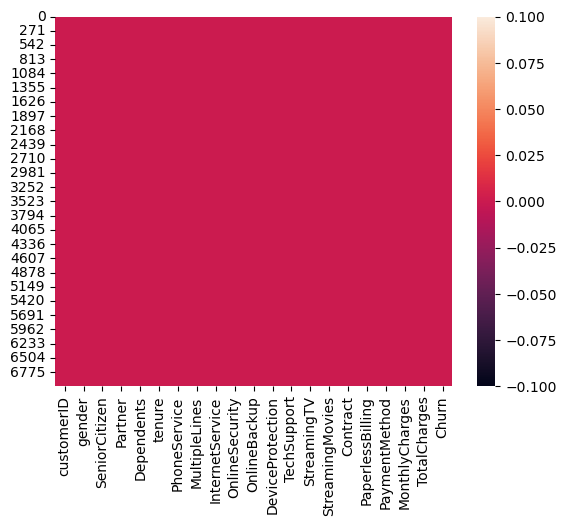

In [11]:
# Lets visualize it using heatmap
sns.heatmap(df.isnull())

And we clearly visualize that there is no missing data presents

In [12]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df['TotalCharges'].nunique()

6531

In [14]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

These are the value counts of all columns and we can see blank in total charges column.

In [15]:
# Checking the unique values of totalcharges column
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
df[df['TotalCharges'].str.contains(" ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locating the TotalCharges we can find this column has space as values but it was showing column by 
some values

In [17]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges'].value_counts()  

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# COnverting object datatype to float datatype
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

Now we can see that total charges column are converted into floats

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we have filled blank spaces with nan values in TotalCharges are mean of these data

In [21]:
np.mean(df['TotalCharges'])

2283.3004408418656

In [22]:
df.iloc[488:500,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
489,8372-JUXUI,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,74.35,Yes
490,3552-CTCYF,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,6597.25,No
491,6778-YSNIH,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.00,114.15,No
492,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
493,5756-OZRIO,Male,1,Yes,No,61,Yes,Yes,DSL,No,...,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.60,No
494,6579-JPICP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.40,No
495,8205-OTCHB,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.60,Yes
496,4134-BSXLX,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.90,1785.65,No
497,0505-SPOOW,Female,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No


In [23]:
# Checking the mean of totalcharges with its mean
print("The Mean Value OF TotalCharges is: ", df['TotalCharges'].mean())

The Mean Value OF TotalCharges is:  2283.3004408418656


In [24]:
# Filling null vlaues in totalCharges woth its mean
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [25]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

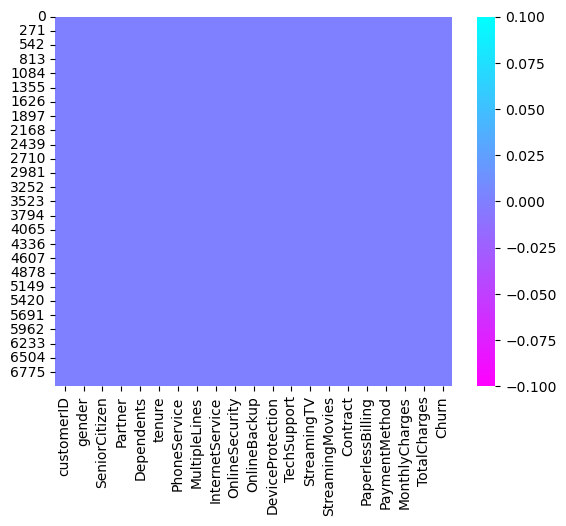

In [26]:
# Lets Check the null vlaues again
sns.heatmap(df.isnull(),cmap="cool_r")

In [27]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [28]:
# Separating Numerical and Categorical Columns

# Checking for categorical Coumns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

# Checking for numerica columns
numerical_col = []
for i  in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [29]:
# Checking number of uniqie values in ech column
df.nunique().to_frame("No. of unique values")

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


These are the unique values present in the dataset .

In [30]:
# Dropping customerId column
df.drop("customerID",axis = 1, inplace= True)

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Data Visualization

# Univariate Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


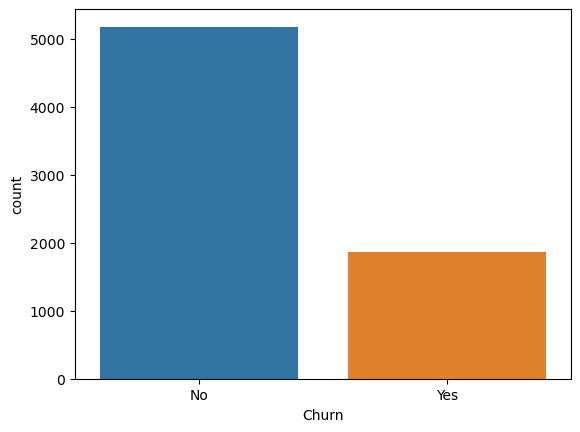

In [34]:
# visualize the number of churned customer
ax=sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

We clear see that count of "No Churn" are high compared to "Yes churn"  thats clear more number of
customer are not churn

Male      3555
Female    3488
Name: gender, dtype: int64


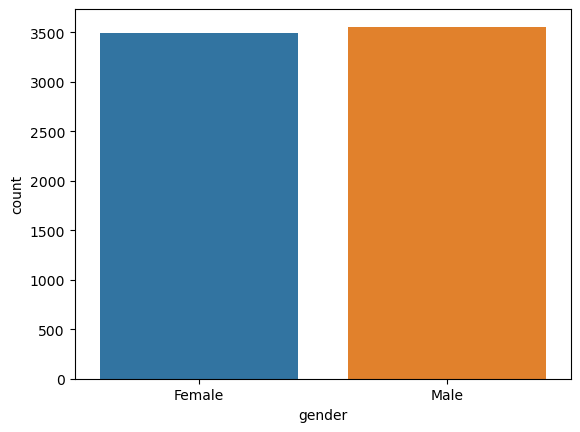

In [35]:
# visualize the count of gender
print(df['gender'].value_counts())
ax=sns.countplot(x='gender',data=df)
plt.show()

Its clear see that  a lot of Male custoemr is more as compare to female customer

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


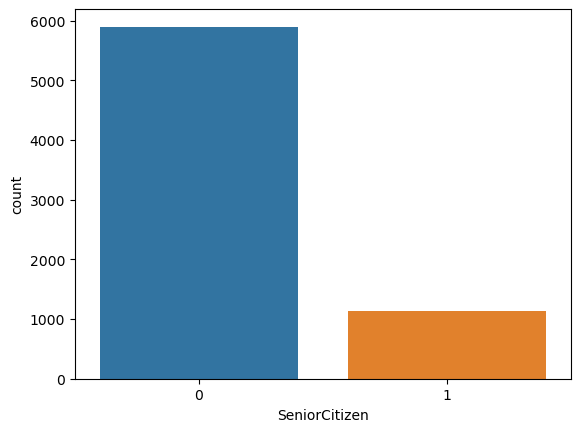

In [36]:
# visualize the count of contract
print(df['SeniorCitizen'].value_counts())
ax=sns.countplot(x='SeniorCitizen',data=df)
plt.show()

In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


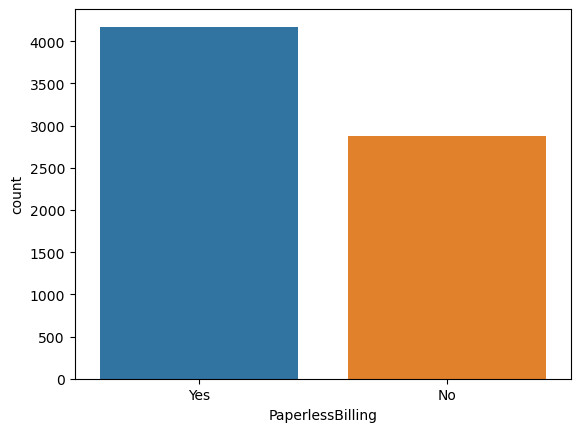

In [38]:
# visualize the count of paperless billing
print(df['PaperlessBilling'].value_counts())
ax=sns.countplot(x='PaperlessBilling',data=df)
plt.show()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


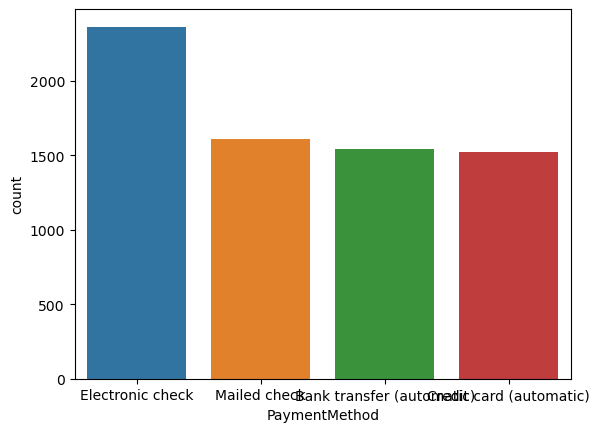

In [39]:
# visualize the count of PaymentMethod
print(df['PaymentMethod'].value_counts())
ax=sns.countplot(x='PaymentMethod',data=df)
plt.show()

Most of the customer use "Electronic Check" as compared to other payment method 

No     3641
Yes    3402
Name: Partner, dtype: int64


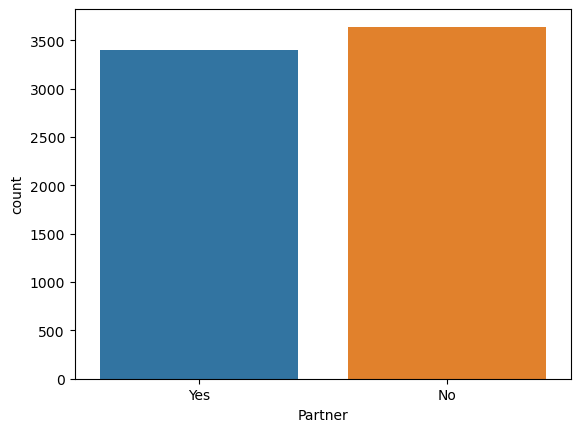

In [40]:
# visualize the count of Partner
print(df['Partner'].value_counts())
ax=sns.countplot(x='Partner',data=df)
plt.show()

No     4933
Yes    2110
Name: Dependents, dtype: int64


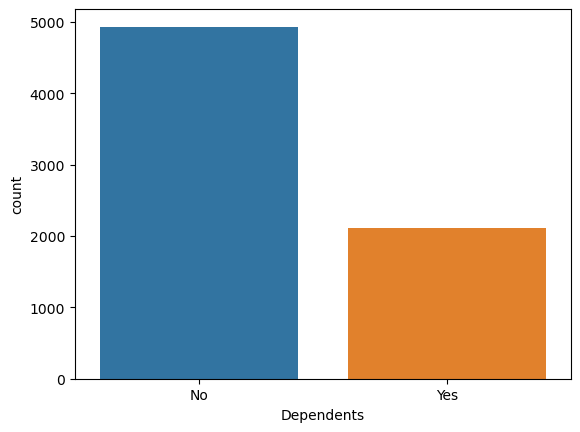

In [41]:
# visualize the count of Dependents
print(df['Dependents'].value_counts())
ax=sns.countplot(x='Dependents',data=df)
plt.show()

Yes    6361
No      682
Name: PhoneService, dtype: int64


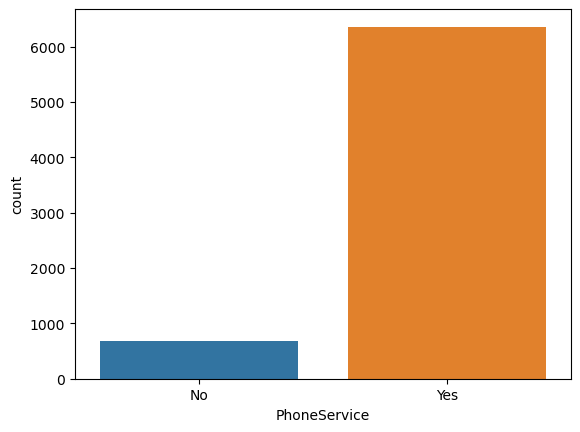

In [42]:
# visualize the count of PhoneService
print(df['PhoneService'].value_counts())
ax=sns.countplot(x='PhoneService',data=df)
plt.show()

The customer who have phone service is larger . Its means most of the people have got phoneservice.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


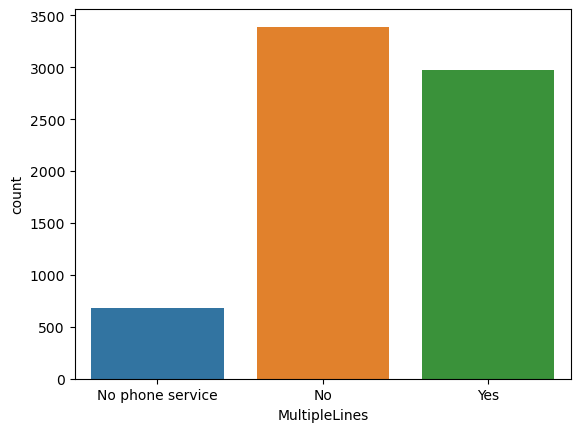

In [43]:
# visualize the count of MultipleLines
print(df['MultipleLines'].value_counts())
ax=sns.countplot(x='MultipleLines',data=df)
plt.show()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


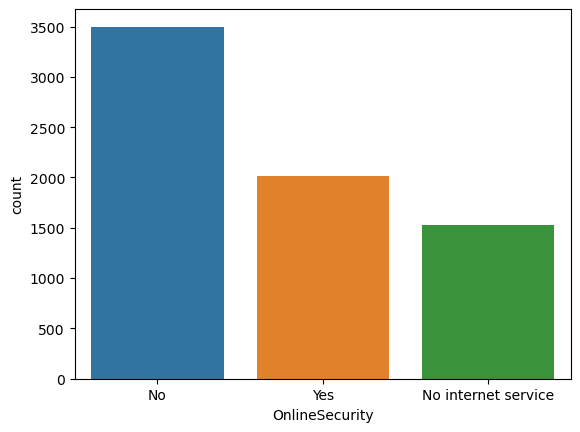

In [44]:
# visualize the count of OnlineSecurity
print(df['OnlineSecurity'].value_counts())
ax=sns.countplot(x='OnlineSecurity',data=df)
plt.show()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


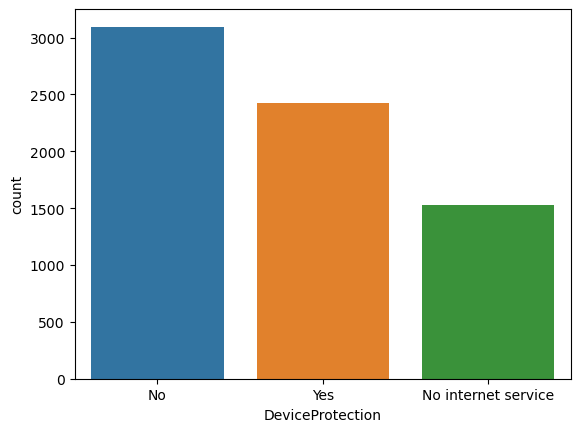

In [45]:
# visualize the count of how many customer have device protection
print(df['DeviceProtection'].value_counts())
ax=sns.countplot(x='DeviceProtection',data=df)
plt.show()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


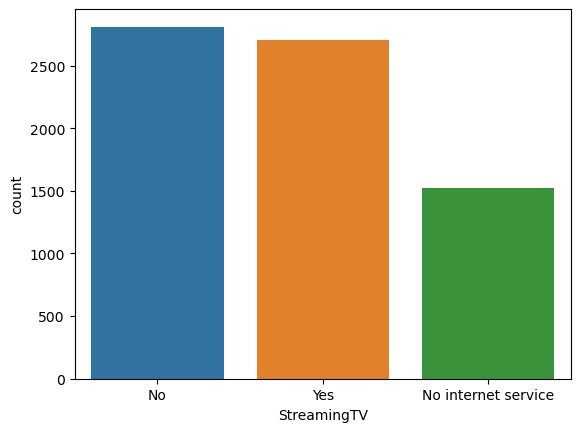

In [46]:
# visualize the count of how many customer have StreamingTV
print(df['StreamingTV'].value_counts())
ax=sns.countplot(x='StreamingTV',data=df)
plt.show()

The customer who do not have StreamingTv is high in count   and the less cusotmer who do not internet Service

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


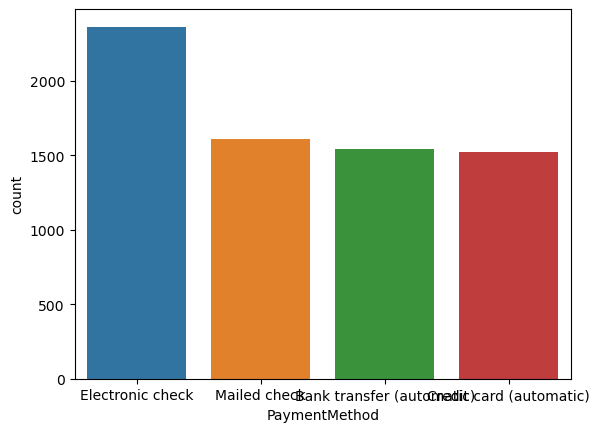

In [47]:
# visualize the count of how many customer have PaymentMethod
print(df['PaymentMethod'].value_counts())
ax=sns.countplot(x='PaymentMethod',data=df)
plt.show()

Most of the customer prefer Electronic Check as compared to other PaymentMethod

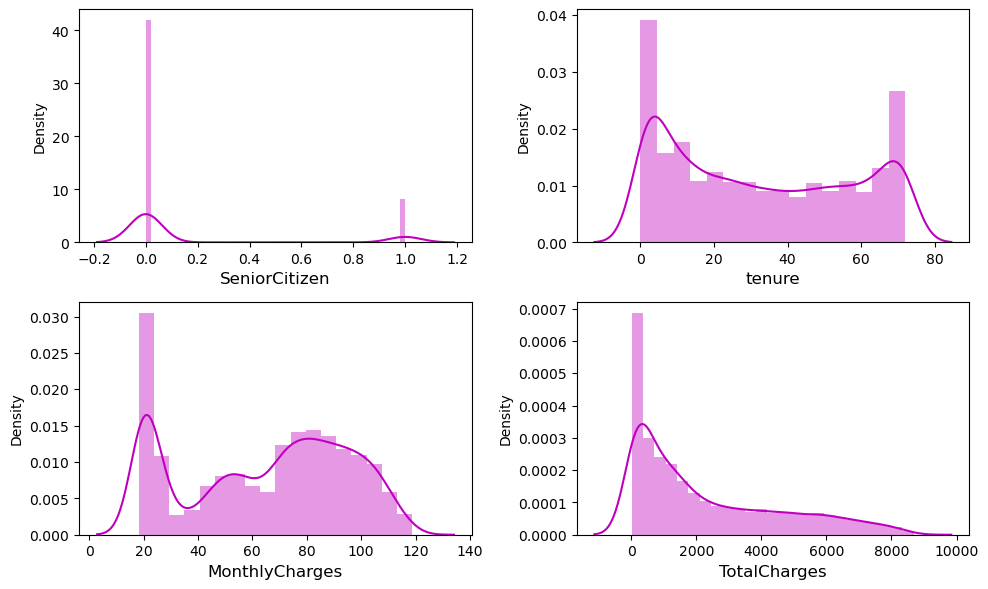

In [48]:
# lets check the how the data has been distributed in remainig column
plt.figure(figsize=(10,6),facecolor= 'white')
plotnumber=1
for col in numerical_col:
    ax=plt.subplot(2,2,plotnumber)
    sns.distplot(df[col],color="m")
    plt.xlabel(col,fontsize=12)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Bivariate Analysis

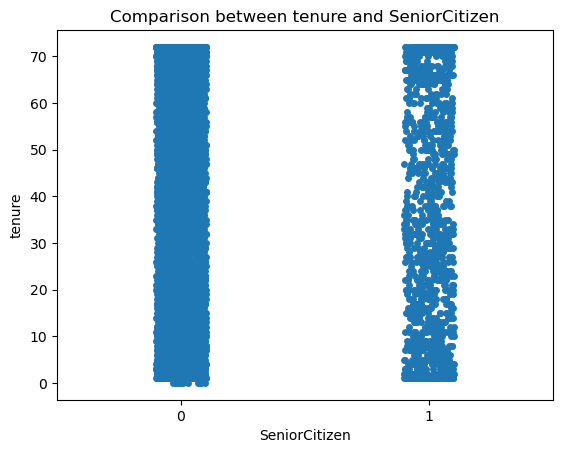

In [49]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x="SeniorCitizen", y= "tenure",data=df)
plt.show()

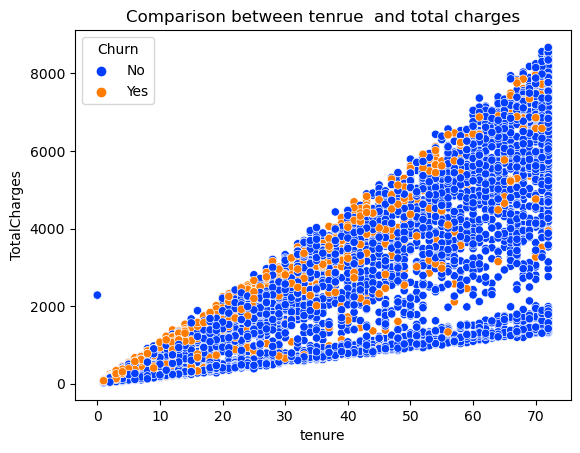

In [50]:
# COmparing tenure and TotlaCharges
plt.title("Comparison between tenrue  and total charges")
sns.scatterplot(x='tenure',y='TotalCharges',data=df,hue='Churn',palette="bright")
plt.show()

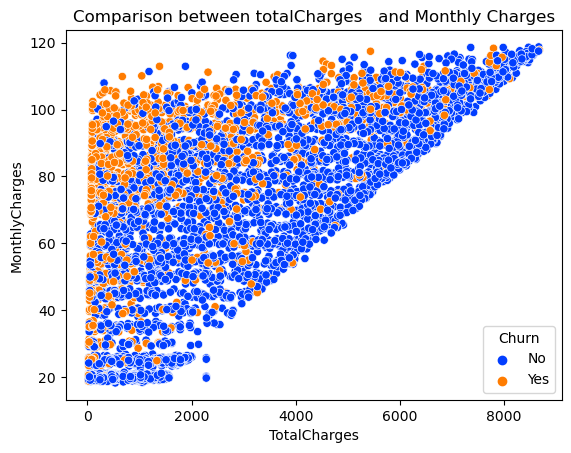

In [51]:
# COmparing  TotalCharges and monthly charges
plt.title("Comparison between totalCharges   and Monthly Charges")
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=df,hue='Churn',palette="bright")
plt.show()

Its clear show that totalcharge is high as compared to monthly  charges 

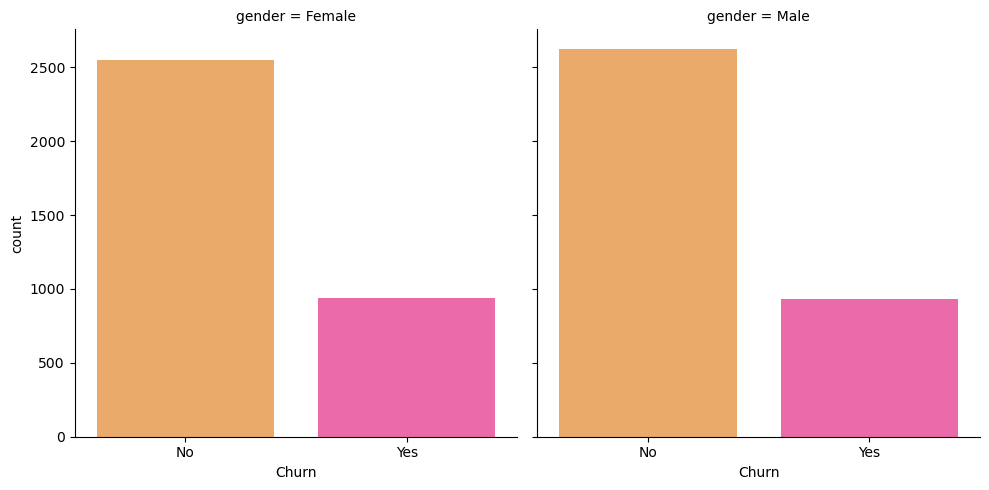

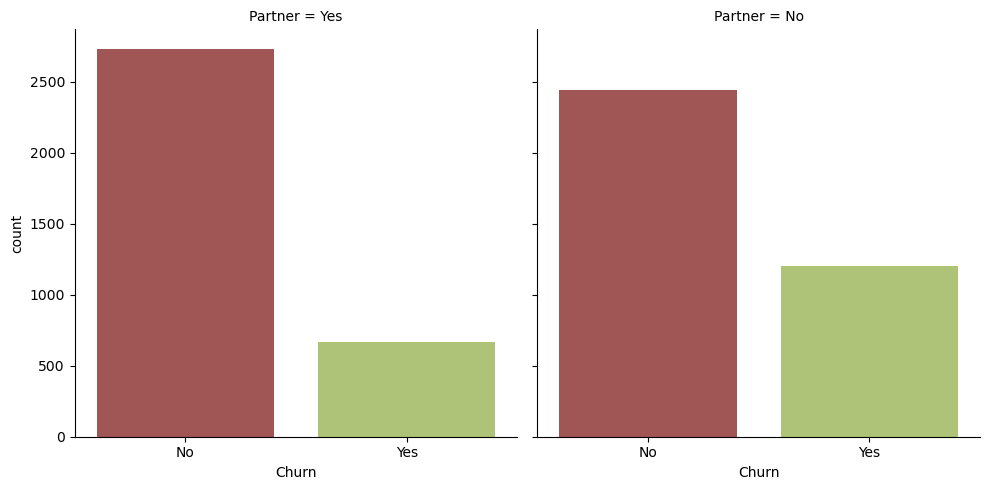

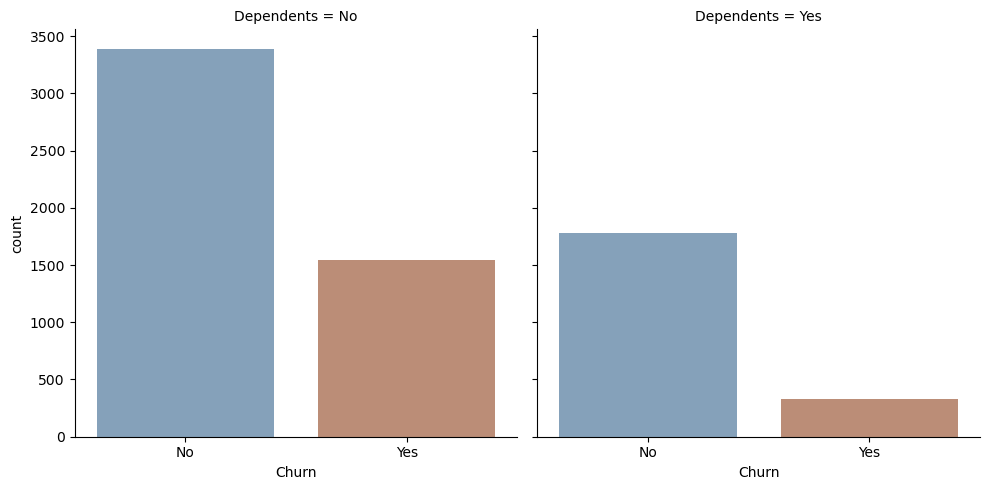

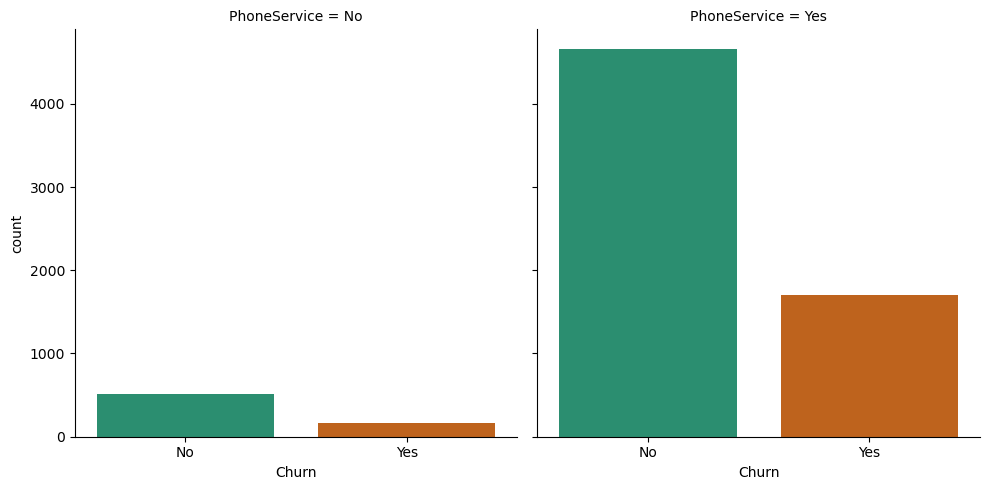

In [52]:
# checking churn level and gender
sns.catplot(x="Churn",col='gender',data=df,kind="count",palette="spring_r")

# checking churn level and partner
sns.catplot(x="Churn",col='Partner',data=df,palette="tab20b_r",kind="count")

# checking churn level and Dependents
sns.catplot(x="Churn",col='Dependents',data=df,kind="count",palette="twilight_shifted")

# checking churn level and PhoneService
sns.catplot(x="Churn",col='PhoneService',data=df,kind="count",palette="Dark2")

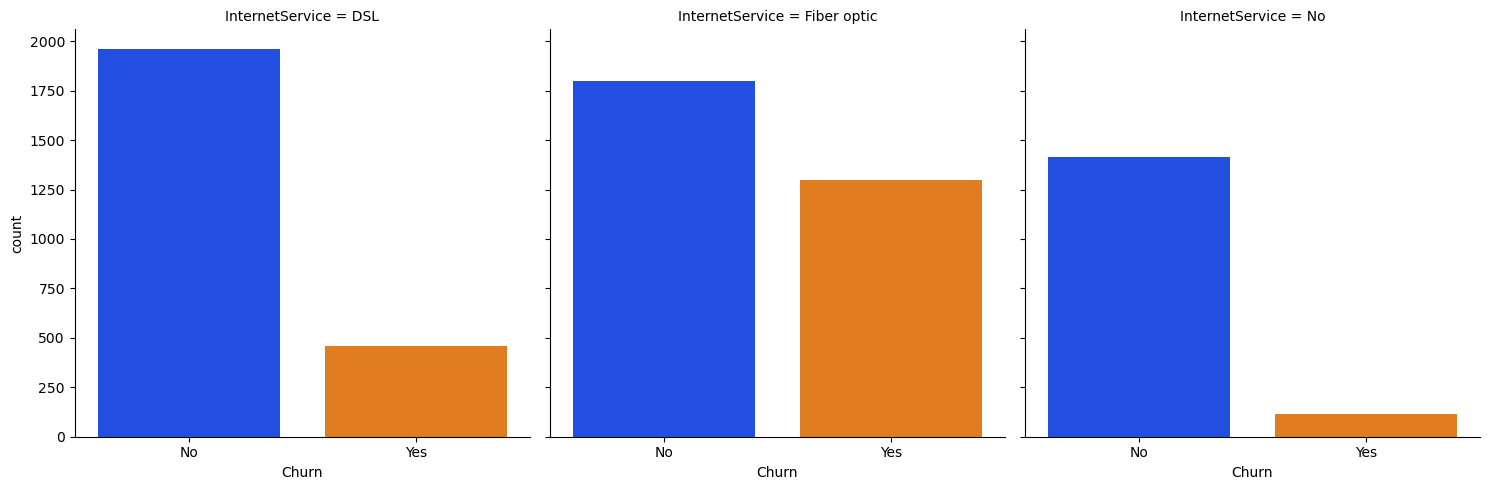

In [53]:
# checking churn level in InternetService
sns.catplot(x="Churn",col='InternetService',data=df,kind="count",palette="bright")

The ratio of churn is high when the customer prefer fiber optic internet services compared to other services

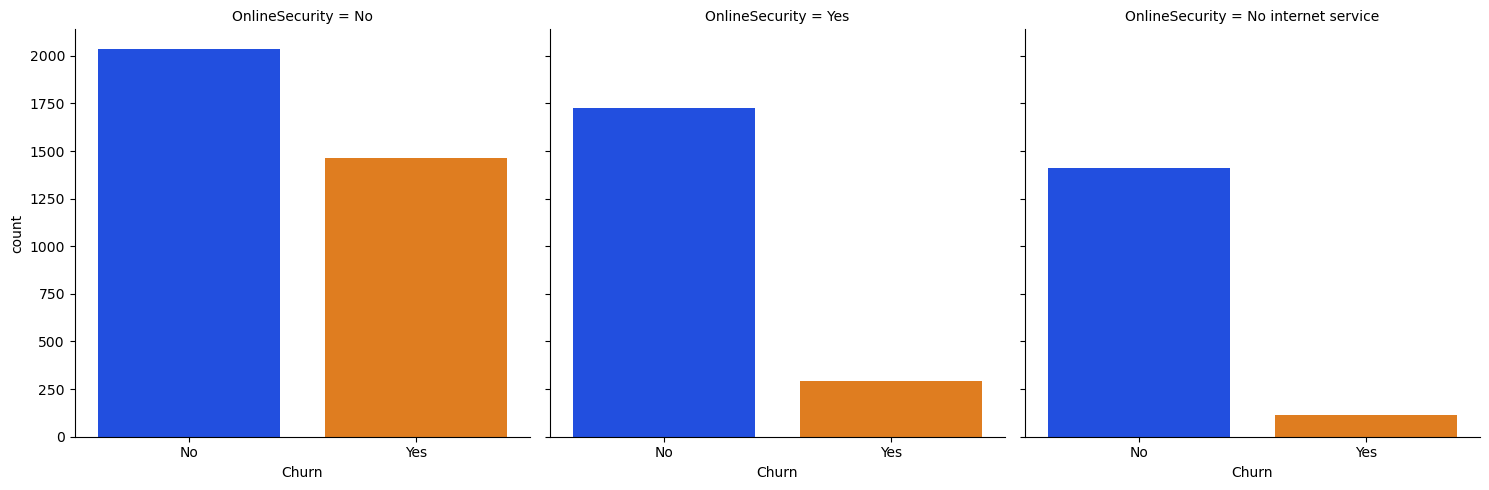

In [54]:
# checking churn level in OnlineSecurity
sns.catplot(x="Churn",col='OnlineSecurity',data=df,kind="count",palette="bright")

The customer who have no internet service have very less churm rate and the cusotmer who do not have online service is hight churn rate

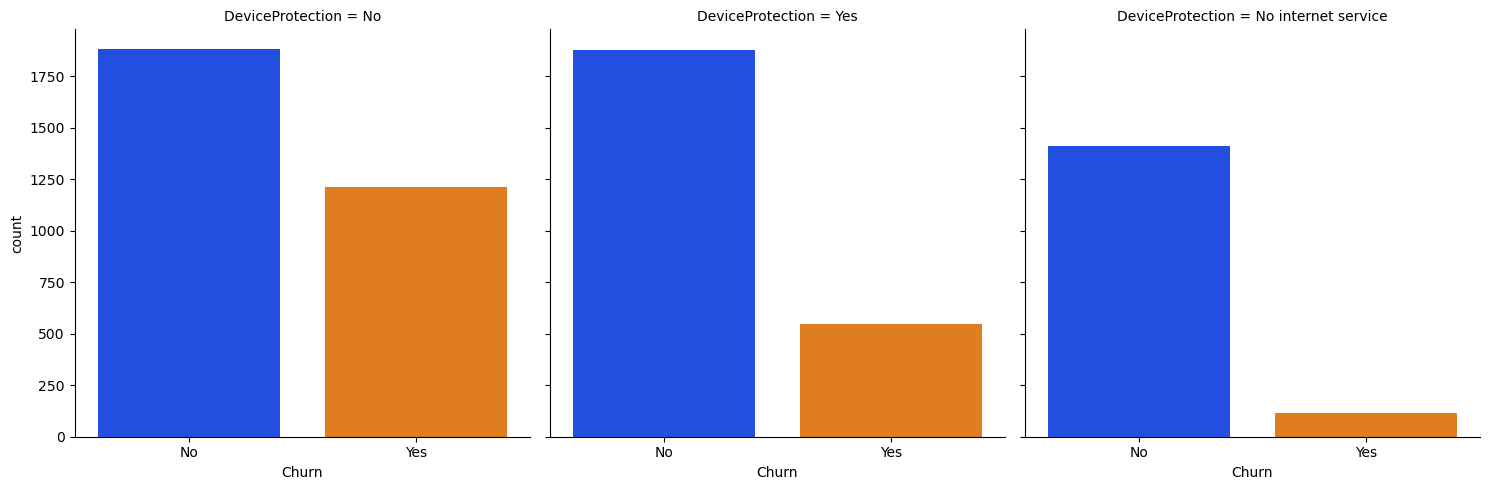

In [55]:
# checking churn level in DeviceProtection
sns.catplot(x="Churn",col='DeviceProtection',data=df,kind="count",palette="bright")

The customer who do not own any device protection have very high churn rate compared to other

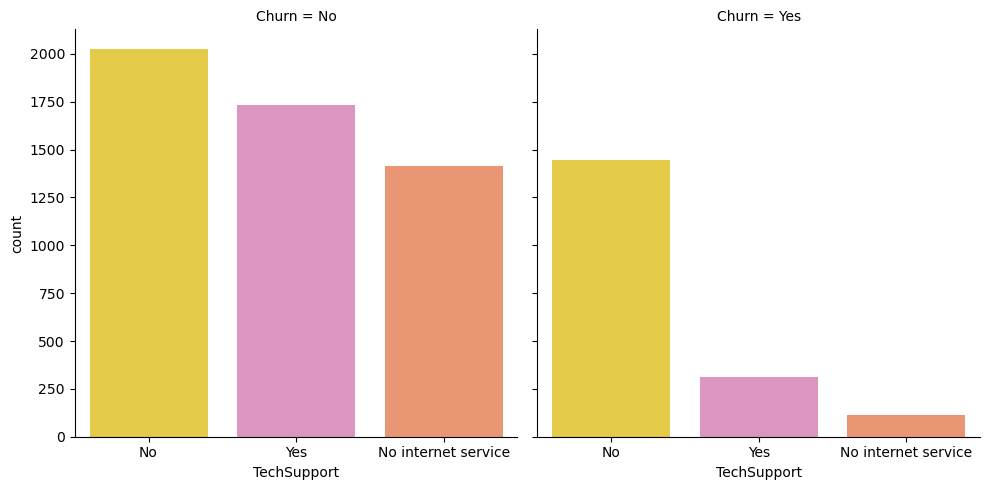

In [56]:
# checking churn level in TechSupport
sns.catplot(x="TechSupport",col='Churn',data=df,kind="count",palette="Set2_r")

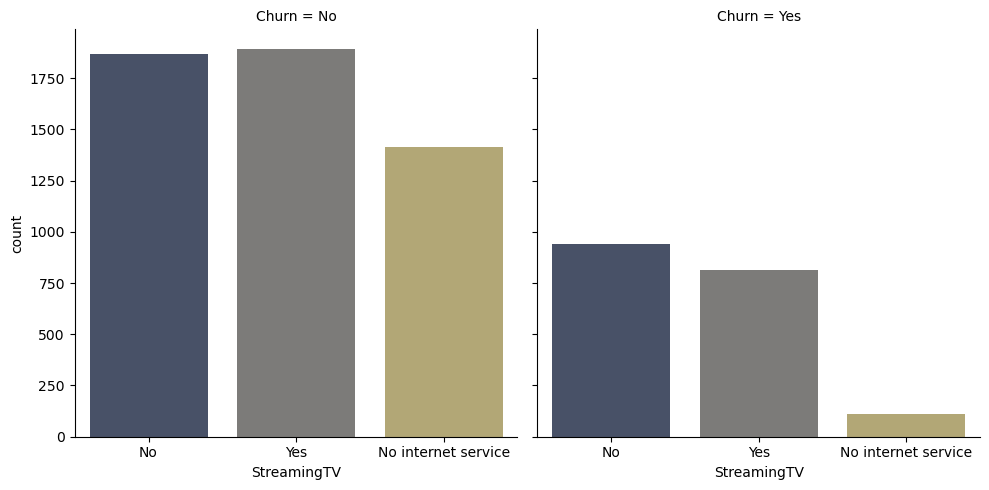

In [57]:
# checking churn level in StreamingTV
sns.catplot(x="StreamingTV",col='Churn',data=df,kind="count",palette="cividis")

The churn rate is nearly same if the customer own StreamingTV or not

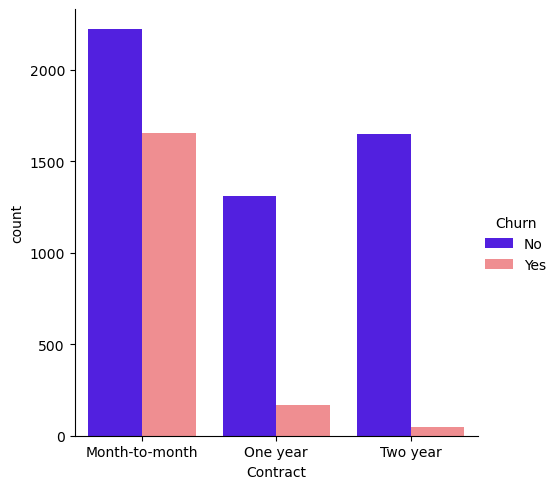

In [58]:
# checking churn rate in contract
sns.catplot(x="Contract",hue = "Churn",palette="gnuplot2",kind="count",data=df)

The customer who have churned are mostly having month to month contract

# Multivariate Analysis

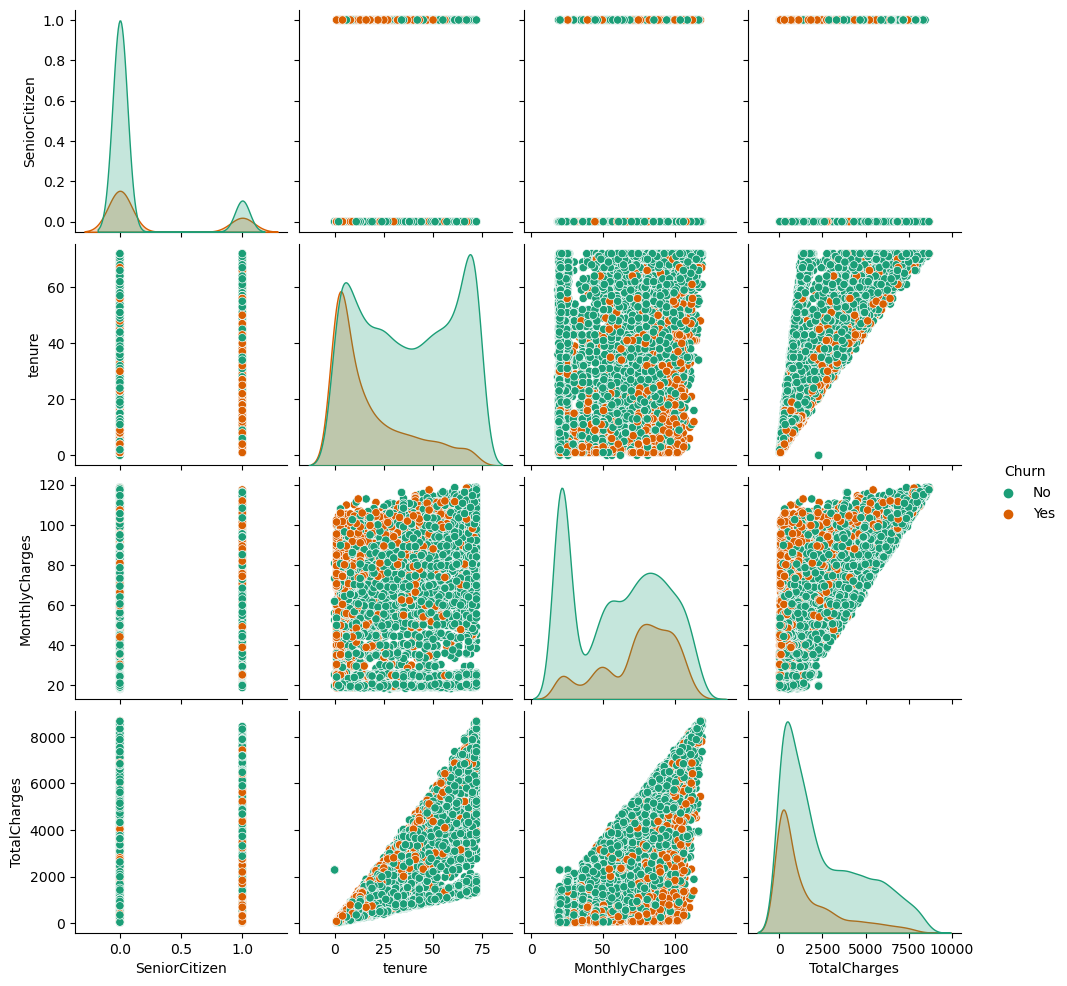

In [59]:
sns.pairplot(df,hue = "Churn",palette="Dark2")
plt.show()

# Checking for outliers

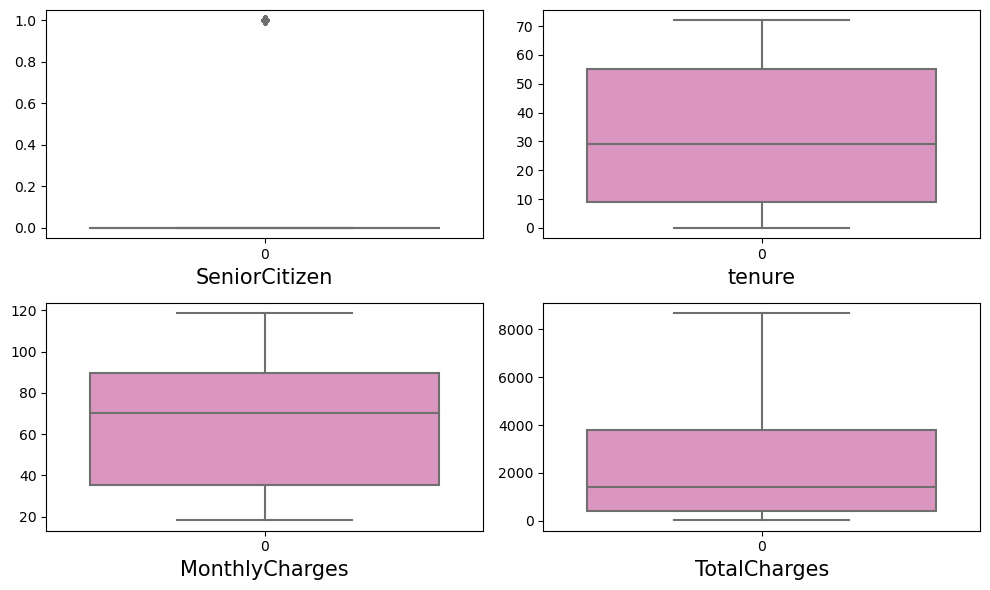

In [60]:
# lets check the outliers by plotting boxplot

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation = 0 , fontsize= 10)
        plotnumber+=1
plt.tight_layout()

Here it clear see that SeniorCitizen has ouliers but it contain categorical data

# Checking for Skewness

In [61]:
# Encoding categorical columns using OrdinalEnocoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [62]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data.Since SeniorCItizen is Caltegorical no need to remove skewness.Since TotalCharges is continuous in natures .Lets use cude root to remove skewness

# Removing Skewness

In [63]:
# Removing skewness using cuberoot method
df['TotalCharges']=np.cbrt(df['TotalCharges'])

In [64]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.011168
Churn               1.063031
dtype: float64

Here we can see the skewness has been reduced in TotalCharges Column.

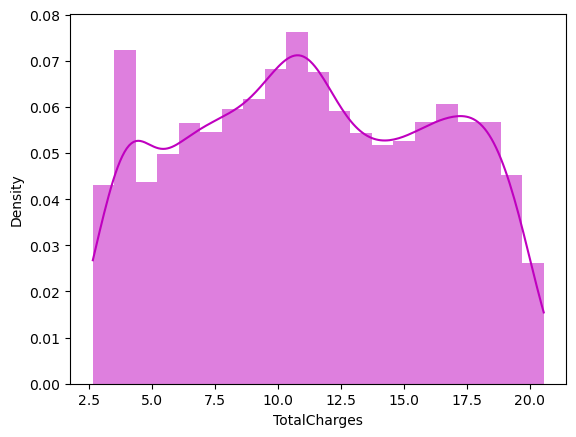

In [65]:
# Plotting the distribution of TotalCharges after addressing skewness

sns.histplot(df['TotalCharges'], color="m", kde=True, stat="density", linewidth=0)
plt.show()


In [66]:
# statistical
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical columns we can see all columns detais here.The counts of all columns are same that means null values in the datasets.

# Correlation between target variable and independent variable

In [67]:
# checking hte correlation between features and the target.
cor=df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


Here this gives the correlation between dependent and independent variable.

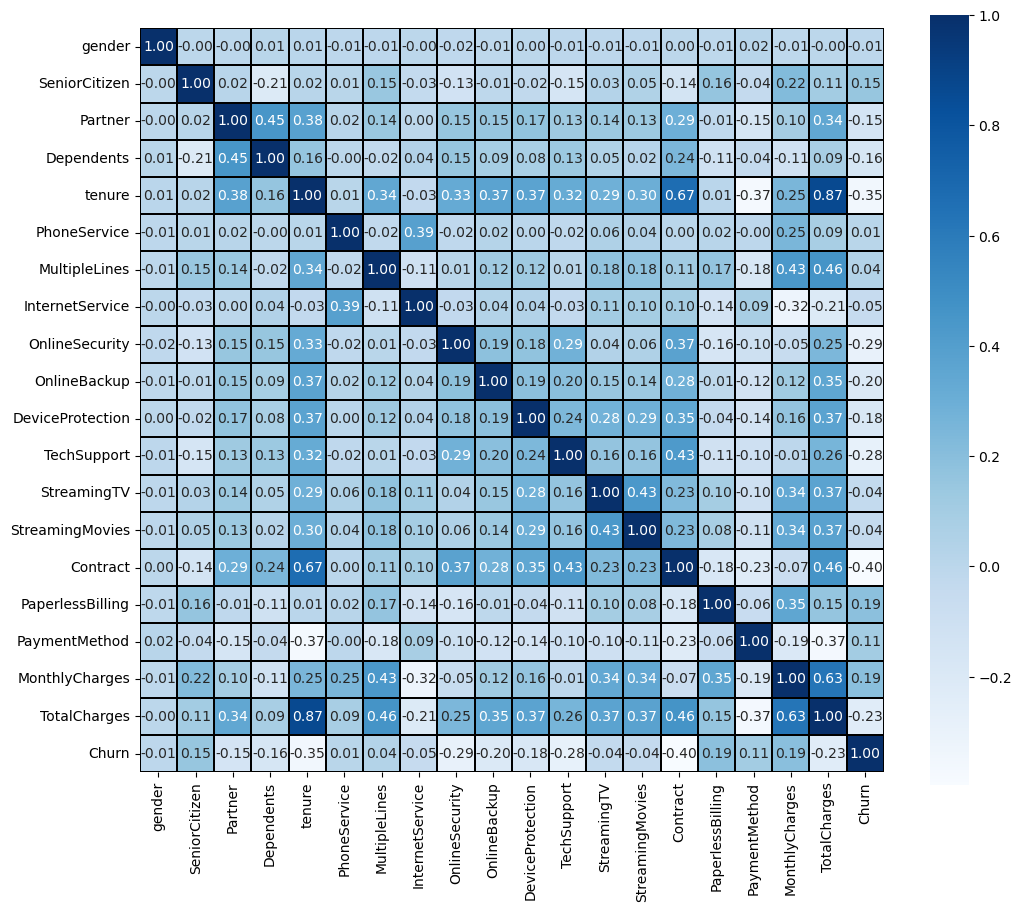

In [68]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f',         # Format of annotations (2 decimal places)
            square=True)       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


In [69]:
cor["Churn"].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

# Visualizing the correlation between label and features using bar plot

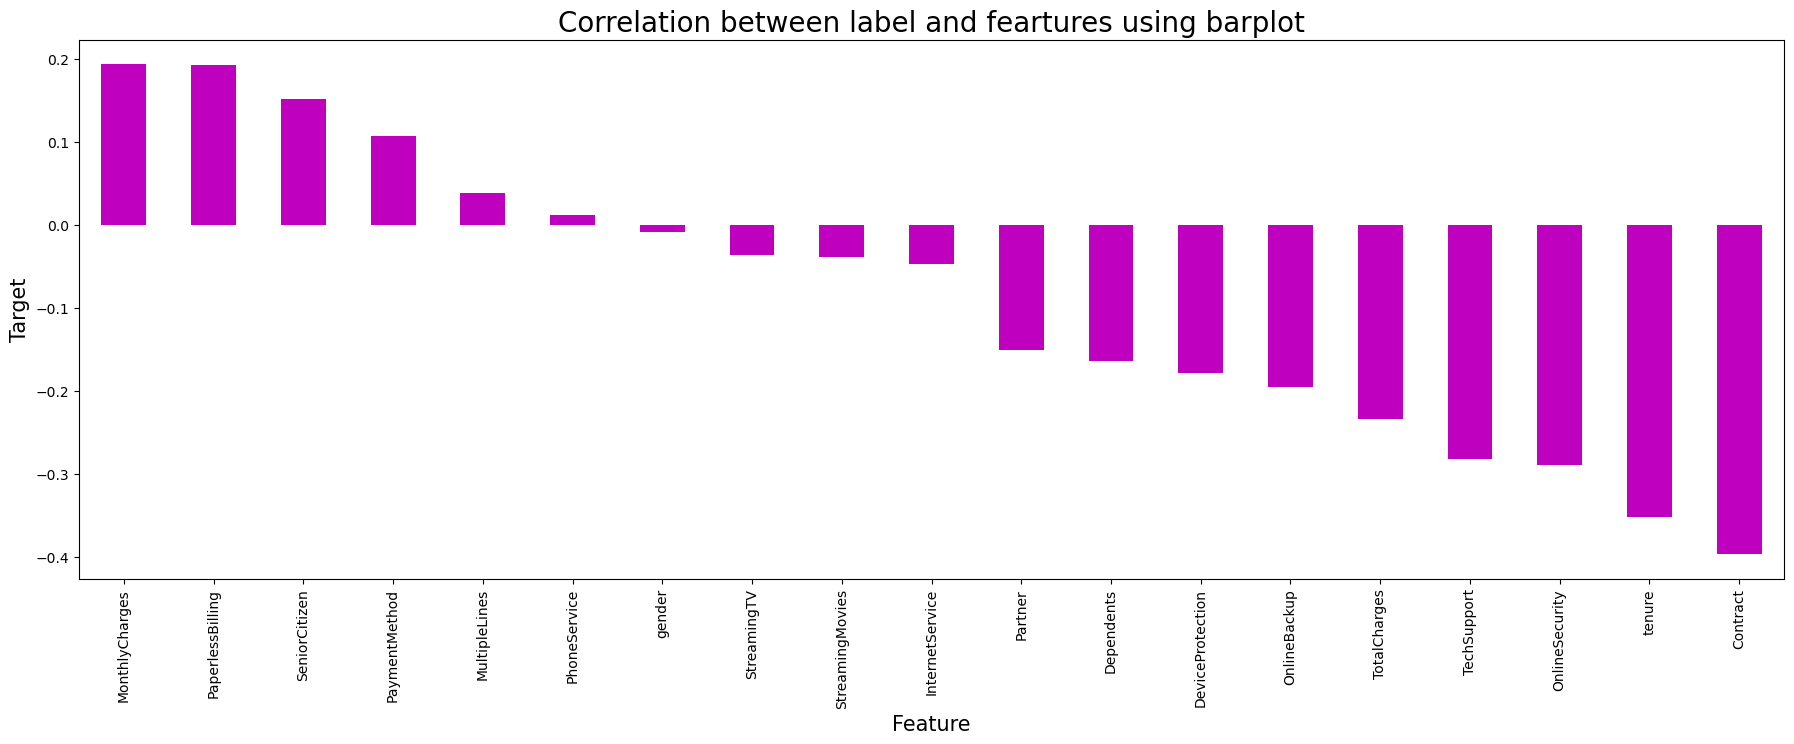

In [70]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize =15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and feartures using barplot",fontsize=20)
plt.show()

Here we can see that phone services correlation is very low

# Separating features and label

In [71]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

# Feature Scaling using Standard Scalarization

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


# Checking Variance inflation Factor (VIF)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Vif Values"] = [variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,Vif Values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features VIF value greater then 10 which means they have high correlation with other features. We will drop one of the exist the we will try to remove the colun having high VIF

In [74]:
# Droping totalCharges column
x.drop("TotalCharges",axis = 1, inplace= True)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Vif Values"] = [variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,Vif Values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So we have solved multicolinearity issue

In [76]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can see that data is not balanced

# Oversampling 

In [77]:
# Oversampling used to balance the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [78]:
y1.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Here we can see that succesfully balance the data using oversmapling

Now we can build machine learning  algorithm

# Modelling

In [79]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestClassifier
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    
    # Making predictions on the test set
    pred = RFR.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i


In [80]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.8669887278582931 at random_state 40


# Creating train test split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.30,random_state = maxRS)

# Classification Algorithm

In [82]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score


# RandomForestClassifier

In [83]:
# Instantiate and train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)


Accuracy: 0.7685754850922859
Confusion Matrix:
[[1354  199]
 [ 290  270]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      1553
         1.0       0.58      0.48      0.52       560

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



# Logistic Regression

In [84]:
# Checking accuracy for logistic Regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_lg)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_lg)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_lg)
print("Classification Report:")
print(report)

Accuracy: 0.7865593942262187
Confusion Matrix:
[[1365  188]
 [ 263  297]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1553
         1.0       0.61      0.53      0.57       560

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



The accuracy using logistic Regression is 78.65%

# Support Vector Machine

In [85]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_svc)
print("Classification Report:")
print(report)

Accuracy: 0.7851396119261713
Confusion Matrix:
[[1390  163]
 [ 291  269]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1553
         1.0       0.62      0.48      0.54       560

    accuracy                           0.79      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



The accuracy using Support Vector Machine Classifier is 78.51%

# Gradient Boosting Classifier

In [86]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_gb=GB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_gb)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_gb)
print("Classification Report:")
print(report)

Accuracy: 0.795551348793185
Confusion Matrix:
[[1389  164]
 [ 268  292]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1553
         1.0       0.64      0.52      0.57       560

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy using GradientBoostingClassifier is 79.55%

# AdaBoostClassifier

In [87]:
# Checking accuracy for AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pred_ab=AB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_ab)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ab)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_ab)
print("Classification Report:")
print(report)

Accuracy: 0.7889256980596309
Confusion Matrix:
[[1372  181]
 [ 265  295]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1553
         1.0       0.62      0.53      0.57       560

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.71      2113
weighted avg       0.78      0.79      0.78      2113



The accuracy using AdaBoostClassifier is 78.89%

# Bagging Classifier

In [88]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
pred_bc=BC.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_bc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_bc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_bc)
print("Classification Report:")
print(report)

Accuracy: 0.7789872219592996
Confusion Matrix:
[[1383  170]
 [ 297  263]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      1553
         1.0       0.61      0.47      0.53       560

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



The accuracy_score using BaggingClassifier is 77.89%

# Extra Trees Classifier

In [89]:
# Checking accuracy for the ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_et=ET.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_et)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_et)
print("Classification Report:")
print(report)

Accuracy: 0.7534311405584477
Confusion Matrix:
[[1340  213]
 [ 308  252]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84      1553
         1.0       0.54      0.45      0.49       560

    accuracy                           0.75      2113
   macro avg       0.68      0.66      0.66      2113
weighted avg       0.74      0.75      0.75      2113



# Cross Validation Score

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
# Checking cv socre for RandomForestClassifier
score=cross_val_score(rf,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_rf)-score.mean())

[0.77342995 0.79082126 0.88937198 0.90140164 0.9101015 ]
0.8530252660040206
Difference between Accuracy score and cross validation score is : -0.08444978091173472


In [92]:
# Checking cv socre for LogisticRegression
score=cross_val_score(lg,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_lg)-score.mean())

[0.7705314  0.75990338 0.77149758 0.79168681 0.77767037]
0.7742579089060271
Difference between Accuracy score and cross validation score is : 0.012301485320191596


In [93]:
# Checking cv socre for SupportVectorMachine
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_svc)-score.mean())

[0.79914833 0.80411639 0.78424414 0.79971591 0.80113636]
0.7976722288534744
Difference between Accuracy score and cross validation score is : -0.01253261692730312


In [94]:
# Checking cv socre for GradientBooster
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_gb)-score.mean())

[0.81476224 0.8012775  0.78495387 0.80397727 0.80752841]
0.802499858861862
Difference between Accuracy score and cross validation score is : -0.006948510068677027


In [95]:
# Checking cv socre for AdaBoostingClassifier
score=cross_val_score(AB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_ab)-score.mean())

[0.81121363 0.80482612 0.79914833 0.80539773 0.80752841]
0.8056228426027486
Difference between Accuracy score and cross validation score is : -0.01669714454311777


In [96]:
# Checking cv socre for BaggingClassifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_bc)-score.mean())

[0.77714691 0.78069553 0.76508162 0.77911932 0.79048295]
0.7785052664688045
Difference between Accuracy score and cross validation score is : 0.0004819554904951229


In [97]:
# Checking cv socre for Extra Trees Classifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", accuracy_score(y_test,pred_et)-score.mean())

[0.80966184 0.80724638 0.89516908 0.90091832 0.90671822]
0.8639427668154
Difference between Accuracy score and cross validation score is : -0.11051162625695232


Extra trees classifier is our best model as the Difference between Accuracy score and cross validation score is least

Extra Trees Classifier is our best Model

# Hyper Parameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

# Define the parameter 
parameters = {'criterion':['gini','entropy'],
              'random_state':[10,50,1000],
              'max_depth': [0,10,20],
              'n_jobs':[-2,-1,1],
              'n_estimators' : [50,100,200,300]}

In [99]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv = 5)

In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [101]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [102]:
Final_model = ExtraTreesClassifier ( criterion = "entropy" , max_depth = 10,n_jobs = -2,random_state = 1000,n_estimators = 200)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

78.41930903928065


In [104]:
Final_model = ExtraTreesClassifier ( criterion = "gini" , max_depth = 10,n_jobs = -2,random_state = 50,n_estimators = 200)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

78.32465688594415


# Plotting ROC and compare AUC for all the models used

In [130]:
# Plotting for all model used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve,auc

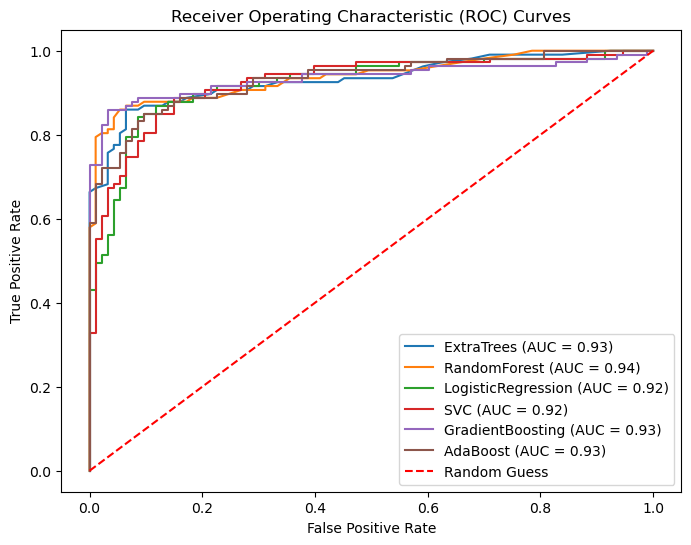

In [146]:
# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Train classifiers and compute ROC curves
plt.figure(figsize=(8, 6))
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_score = clf.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Plot random guess line (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Show plot
plt.show()


Here we can see area under curve for each model used

# Plotting ROC and compare AUC for best model

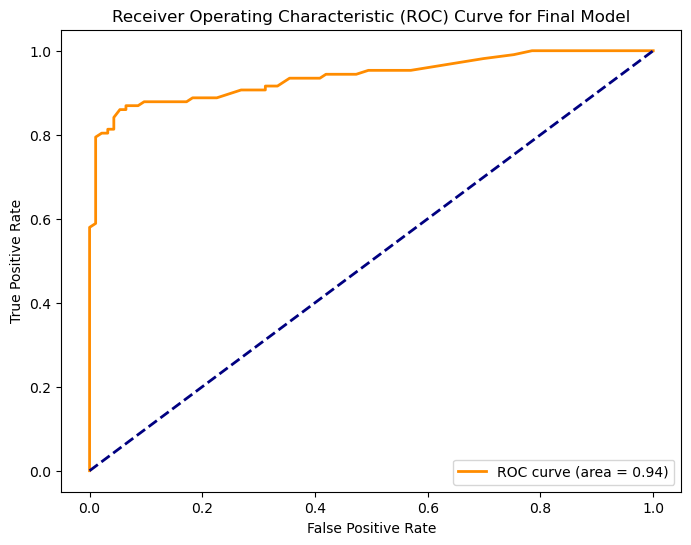

In [150]:
# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the final model (e.g., RandomForestClassifier)
Final_model = RandomForestClassifier(random_state=42)
Final_model.fit(x_train, y_train)

# Obtain predicted probabilities for the positive class
y_score = Final_model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Final Model')
plt.legend(loc='lower right')
plt.show()


Here we have plotted the ROC curve the final model 

# Saving the model using joblib

In [153]:
# Saving the model
import joblib
joblib.dump(Final_model,"Telecom_Customer_Analysis.pkl")

['Telecom_Customer_Analysis.pkl']

# Predicting the saved model

In [154]:
model = joblib.load("Telecom_Customer_Analysis.pkl")
# prediction 
prediction = model.predict(x_test)
prediction

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1])

These are predicted churn value of the customers

In [155]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,1,1
2,0,1
3,1,1
4,1,1
...,...,...
195,1,1
196,1,1
197,1,1
198,0,0


# THANK YOU 